
📈 Polynomial Regression (degree=1)
MAE: 16.0181
MSE: 406.7056
R²: -0.0003


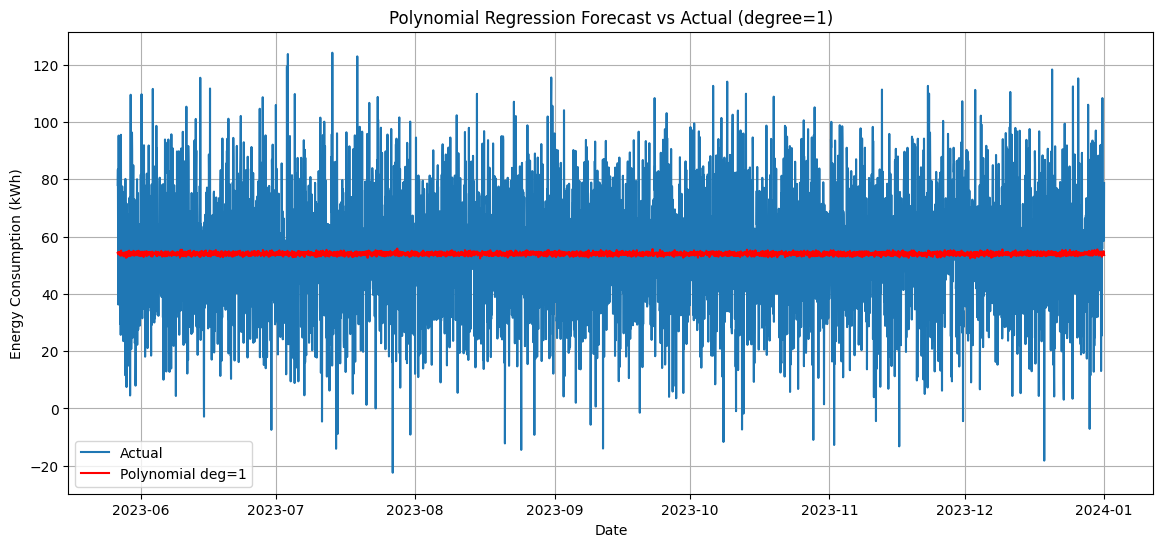


📈 Polynomial Regression (degree=2)
MAE: 16.1142
MSE: 412.2625
R²: -0.0139


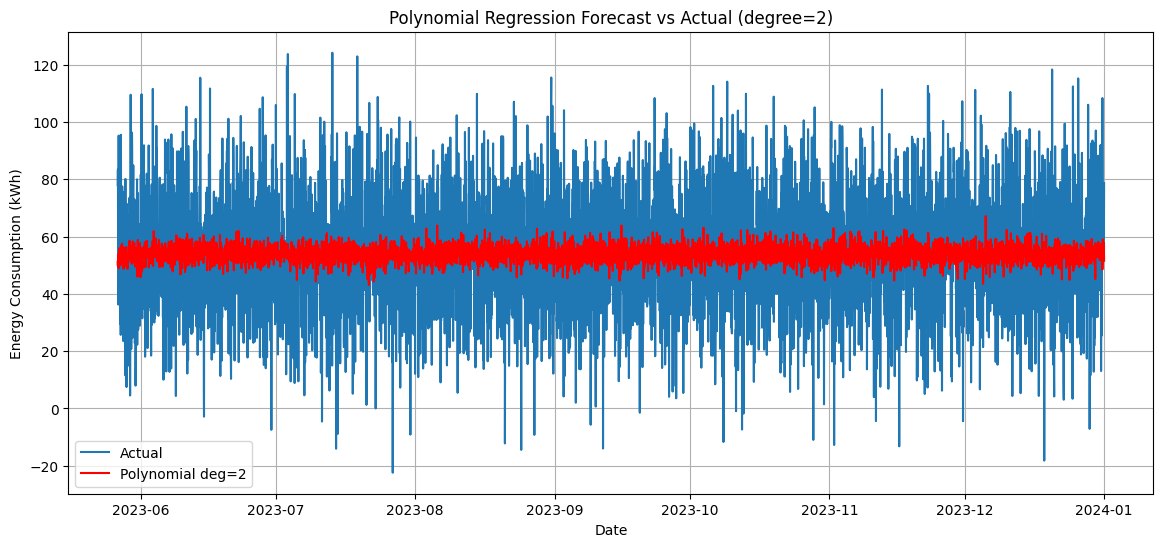

MemoryError: Unable to allocate 7.34 GiB for an array with shape (47326, 20825) and data type float64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= تبدیل فرمت تاریخ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)

# ============================= پاک‌سازی داده‌ها =============================
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ============================= مرتب‌سازی =============================
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# ============================= کدگذاری ستون‌های غیرعددی =============================
categorical_cols = [
    'Building Type',
    'Occupancy Schedule',
    'Building Orientation',
    'Peak Demand Reduction Indicator',
    'Carbon Emission Reduction Category'
]

df = pd.get_dummies(df, columns=categorical_cols)

# ============================= تنظیم ایندکس و پرکردن گپ‌های زمانی =============================
df.set_index('Timestamp', inplace=True)
df = df.asfreq('h')  # فواصل زمانی ساعتی
df.interpolate(method='linear', inplace=True)  # پر کردن گپ‌ها

# ============================= جدا کردن ستون هدف =============================
target_col = 'Energy Consumption (kWh)'
features = df.drop(columns=[target_col])
target = df[[target_col]]

# ============================= مقیاس‌بندی =============================
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

features_scaled = scaler_X.fit_transform(features)
target_scaled = scaler_y.fit_transform(target)

# ============================= تقسیم داده به آموزش و تست =============================
train_size = int(len(features_scaled) * 0.9)
X_train, X_test = features_scaled[:train_size], features_scaled[train_size:]
y_train, y_test = target_scaled[:train_size], target_scaled[train_size:]

# ============================= تست چندجمله‌ای با درجات مختلف =============================
degrees = [1, 2, 3, 4, 5]
results = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    # بازگرداندن مقیاس اصلی
    y_test_orig = scaler_y.inverse_transform(y_test)
    y_pred_orig = scaler_y.inverse_transform(y_pred)
    
    mae = mean_absolute_error(y_test_orig, y_pred_orig)
    mse = mean_squared_error(y_test_orig, y_pred_orig)
    r2 = r2_score(y_test_orig, y_pred_orig)
    
    results[d] = (mae, mse, r2)
    
    print(f"\n📈 Polynomial Regression (degree={d})")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    
    # ترسیم
    plt.figure(figsize=(14,6))
    plt.plot(df.index[-len(y_test_orig):], y_test_orig, label="Actual")
    plt.plot(df.index[-len(y_pred_orig):], y_pred_orig, label=f"Polynomial deg={d}", color="red")
    plt.legend()
    plt.title(f"Polynomial Regression Forecast vs Actual (degree={d})")
    plt.xlabel("Date")
    plt.ylabel("Energy Consumption (kWh)")
    plt.grid()
    plt.show()


📊 Descriptive Statistics of Energy Consumption:
count    26296.000000
mean        54.042522
std         19.972114
min         -6.591113
25%         40.424645
50%         54.181266
75%         67.597939
max        114.109789
Name: Energy Consumption (kWh), dtype: float64

🔹 Skewness: -0.0087
🔹 Kurtosis: -0.1610


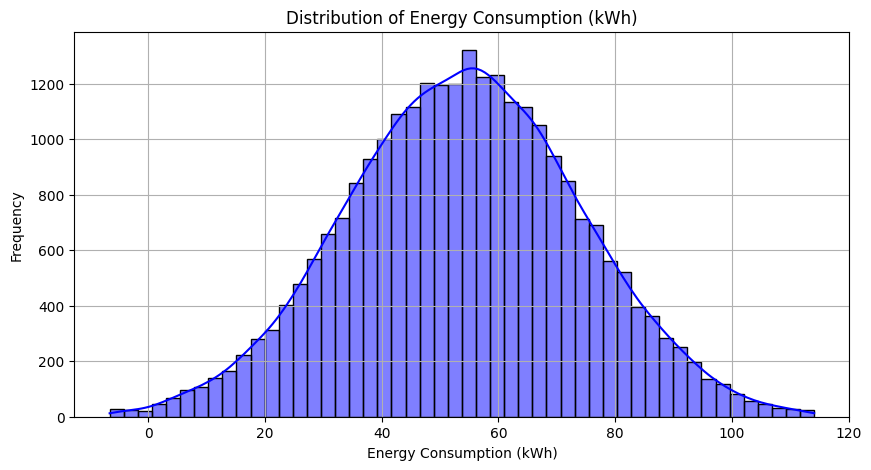

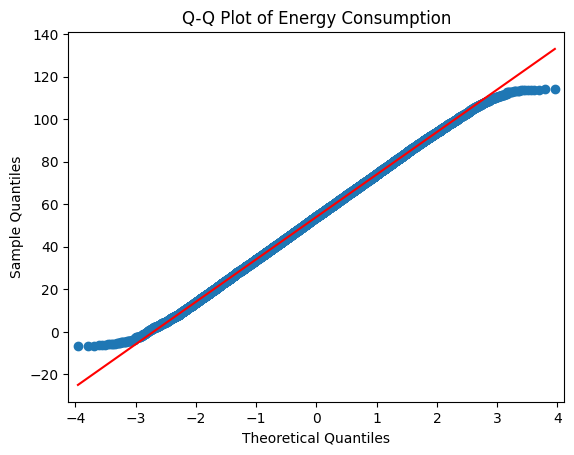

📊 Total Records: 26296
❌ Negative Values Count: 65
📉 Percentage of Negative Values: 0.2472%


In [19]:
######################################Test for data skeweness
###################################### Test for data skewness

import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# ============================= Energy Consumption Column =============================
energy = df['Energy Consumption (kWh)']

# Descriptive Statistics
print("📊 Descriptive Statistics of Energy Consumption:")
print(energy.describe())

# Skewness and Kurtosis
skewness = skew(energy, nan_policy='omit')
kurt = kurtosis(energy, nan_policy='omit')

print(f"\n🔹 Skewness: {skewness:.4f}")
print(f"🔹 Kurtosis: {kurt:.4f}")

# Plot Histogram + KDE
plt.figure(figsize=(10,5))
sns.histplot(energy, bins=50, kde=True, color="blue")
plt.title("Distribution of Energy Consumption (kWh)")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Q-Q Plot for Normality Test
import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(energy, line='s')
plt.title("Q-Q Plot of Energy Consumption")
plt.show()


################################################### Percentage of Negative Values
# Total records
total_count = len(energy)

# Count of negative values
negative_count = (energy < 0).sum()

# Percentage of negative values
negative_percent = (negative_count / total_count) * 100

print(f"📊 Total Records: {total_count}")
print(f"❌ Negative Values Count: {negative_count}")
print(f"📉 Percentage of Negative Values: {negative_percent:.4f}%")


15:32:10 - cmdstanpy - INFO - Chain [1] start processing
15:32:26 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1/20


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


651/651 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - loss: 0.0406
Epoch 2/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 0.0311
Epoch 3/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 0.0308
Epoch 4/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - loss: 0.0303
Epoch 5/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 0.0306
Epoch 6/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 0.0307
Epoch 7/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - loss: 0.0302
Epoch 8/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0308
Epoch 9/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 0.0307
Epoch 10/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 0.0304
Epoch 11/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 0.0306
Epoch 12/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 0.0304
Epoch 13/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0303
Epoch 14/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - loss: 0.0302
Epoch 15/20
651/651 ━━━━━━━━━━━━━━━━━━━━

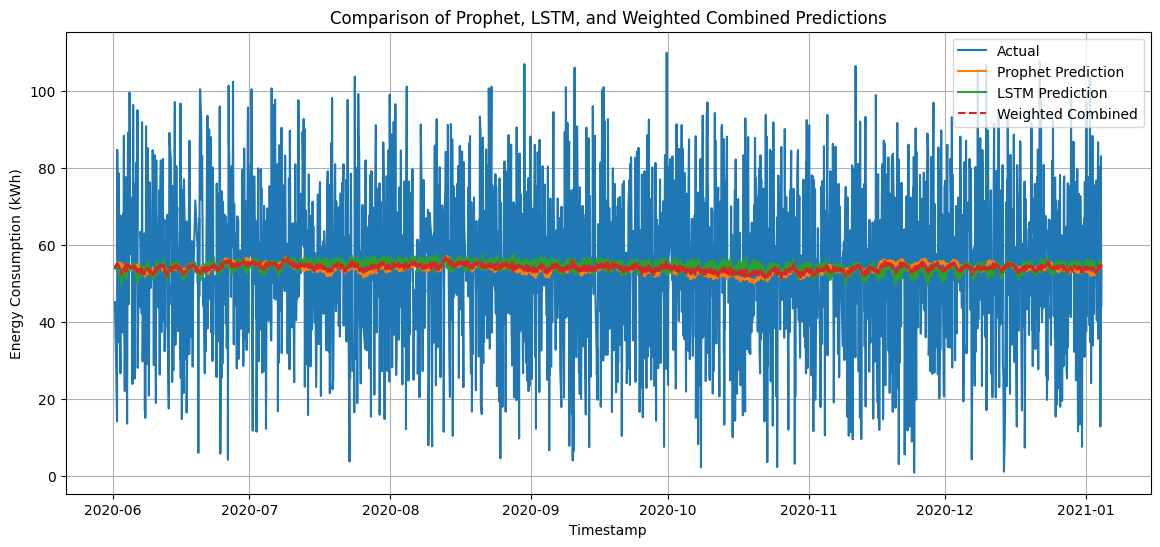

In [ ]:
# ============================= Imports =============================
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import zscore

# ============================= Load Dataset =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= Preprocessing =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# حذف مقادیر منفی انرژی
df = df[df['Energy Consumption (kWh)'] >= 0]

# Remove outliers using Z-score
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# Calendar features
df = df.sort_values('Timestamp')
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# ============================= Add Lag Features =============================
df['lag_24'] = df['Energy Consumption (kWh)'].shift(24)
df['lag_48'] = df['Energy Consumption (kWh)'].shift(48)
df['lag_168'] = df['Energy Consumption (kWh)'].shift(168)  # 1 week lag
df.dropna(inplace=True)  # Drop rows with NaN after lagging

# ============================= Cyclical Encoding for Calendar Features =============================
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

# ============================= Prepare Data for Prophet =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)
df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

# Train/Test split
train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

# ============================= Prophet Model =============================
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_seasonality(name='hourly', period=24, fourier_order=10)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = prophet_model.predict(future)
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= Prepare Data for LSTM =============================
feature_cols = [
    'lag_24', 'lag_48', 'lag_168',
    'hour_sin', 'hour_cos', 'dayofweek_sin', 'dayofweek_cos', 'month_sin', 'month_cos',
    'Temperature (C)', 'Humidity (percent)', 'Occupancy Rate (percent)',
    'Lighting Consumption (kWh)', 'HVAC Consumption (kWh)',
    'Energy Price (kWh)', 'Carbon Emission Rate (g CO2/kWh)'
]
target_col = 'Energy Consumption (kWh)'

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[feature_cols + [target_col]])

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # features
        y.append(data[i+seq_length, -1])     # target
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

# ============================= Build LSTM Model =============================
lstm_model = Sequential([
    LSTM(128, activation='relu', input_shape=(seq_length, X.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# ============================= LSTM Predictions =============================
y_pred_lstm_scaled = lstm_model.predict(X_test)

# Rescale predictions back to original
scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1:], scaler.scale_[-1:]
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()

# ============================= Align Time Index =============================
time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]
prophet_cut = prophet_eval[prophet_eval['ds'].isin(time_index_test)].sort_values('ds').reset_index(drop=True)
min_len = min(len(prophet_cut), len(y_pred_lstm))

# ============================= Weighted Ensemble =============================
w_prophet = 1 / mean_absolute_error(prophet_cut['y'][:min_len], prophet_cut['yhat'][:min_len])
w_lstm = 1 / mean_absolute_error(y_test_actual[:min_len], y_pred_lstm[:min_len])
combined_pred = (w_prophet*prophet_cut['yhat'][:min_len] + w_lstm*y_pred_lstm[:min_len]) / (w_prophet + w_lstm)
y_true = prophet_cut['y'][:min_len]

# ============================= Evaluation =============================
print("\nProphet Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_true, prophet_cut['yhat'][:min_len]):.4f}")
print(f"R2: {r2_score(y_true, prophet_cut['yhat'][:min_len]):.4f}")

print("\nLSTM Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_true, y_pred_lstm[:min_len]):.4f}")
print(f"R2: {r2_score(y_true, y_pred_lstm[:min_len]):.4f}")

print("\nWeighted Combined Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= Visualization =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test[:min_len], y_true, label='Actual')
plt.plot(time_index_test[:min_len], prophet_cut['yhat'][:min_len], label='Prophet Prediction')
plt.plot(time_index_test[:min_len], y_pred_lstm[:min_len], label='LSTM Prediction')
plt.plot(time_index_test[:min_len], combined_pred, label='Weighted Combined', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM, and Weighted Combined Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


17:25:08 - cmdstanpy - INFO - Chain [1] start processing
17:25:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - loss: 0.0380
Epoch 2/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 38s 59ms/step - loss: 0.0321
Epoch 3/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - loss: 0.0315
Epoch 4/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - loss: 0.0313
Epoch 5/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - loss: 0.0306
Epoch 6/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - loss: 0.0312
Epoch 7/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0307
Epoch 8/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 0.0305
Epoch 9/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 0.0307
Epoch 10/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 0.0302
Epoch 11/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - loss: 0.0306
Epoch 12/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - loss: 0.0302
Epoch 13/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 0.0297
Epoch 14/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 0.0299
Epoch 15/20
651/651 ━━━━━━━━━

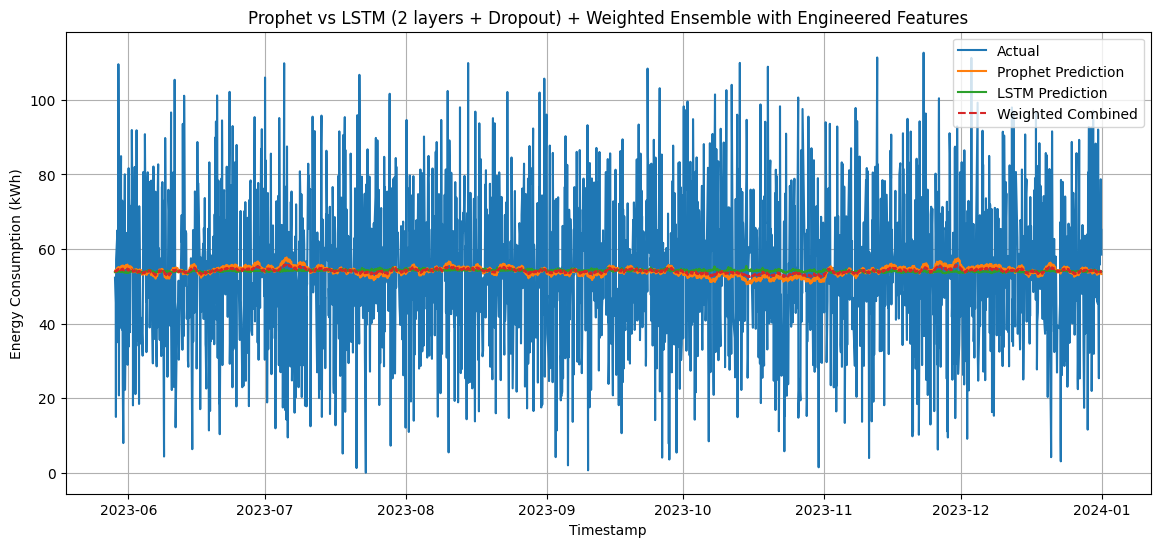

In [ ]:
# ============================= Imports =============================
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.stats import zscore

# ============================= Load Dataset =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= Preprocessing =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# حذف مقادیر منفی انرژی
df = df[df['Energy Consumption (kWh)'] >= 0]

# Remove Outliers using Z-score
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# Calendar features
df = df.sort_values('Timestamp')
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# ============================= Add Lag Features =============================
df['lag_24'] = df['Energy Consumption (kWh)'].shift(24)
df['lag_48'] = df['Energy Consumption (kWh)'].shift(48)
df['lag_168'] = df['Energy Consumption (kWh)'].shift(168)
df.dropna(inplace=True)

# ============================= Cyclical Encoding =============================
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

# ============================= Prepare Data for Prophet =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)
df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_seasonality(name='hourly', period=24, fourier_order=10)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = prophet_model.predict(future)
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= Prepare Data for LSTM =============================
feature_cols = [
    'lag_24', 'lag_48', 'lag_168',
    'hour_sin', 'hour_cos', 'dayofweek_sin', 'dayofweek_cos', 'month_sin', 'month_cos',
    'Temperature (C)', 'Humidity (percent)', 'Occupancy Rate (percent)',
    'Lighting Consumption (kWh)', 'HVAC Consumption (kWh)',
    'Energy Price (kWh)', 'Carbon Emission Rate (g CO2/kWh)'
]
target_col = 'Energy Consumption (kWh)'

df = df[feature_cols + [target_col]].dropna()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

# ============================= Build LSTM Model (2 Layers + Dropout) =============================
lstm_model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# ============================= Predictions =============================
y_pred_lstm_scaled = lstm_model.predict(X_test)

scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1:], scaler.scale_[-1:]
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()

time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]
prophet_cut = prophet_eval[prophet_eval['ds'].isin(time_index_test)].sort_values('ds').reset_index(drop=True)
min_len = min(len(prophet_cut), len(y_pred_lstm))

# ============================= Weighted Ensemble =============================
w_prophet = 1 / mean_absolute_error(prophet_cut['y'][:min_len], prophet_cut['yhat'][:min_len])
w_lstm = 1 / mean_absolute_error(y_test_actual[:min_len], y_pred_lstm[:min_len])
combined_pred = (w_prophet*prophet_cut['yhat'][:min_len] + w_lstm*y_pred_lstm[:min_len]) / (w_prophet + w_lstm)
y_true = prophet_cut['y'][:min_len]

# ============================= Evaluation =============================
print("\nProphet Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_true, prophet_cut['yhat'][:min_len]):.4f}")
print(f"R2: {r2_score(y_true, prophet_cut['yhat'][:min_len]):.4f}")

print("\nLSTM Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_true, y_pred_lstm[:min_len]):.4f}")
print(f"R2: {r2_score(y_true, y_pred_lstm[:min_len]):.4f}")

print("\nWeighted Combined Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= Visualization =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test[:min_len], y_true, label='Actual')
plt.plot(time_index_test[:min_len], prophet_cut['yhat'][:min_len], label='Prophet Prediction')
plt.plot(time_index_test[:min_len], y_pred_lstm[:min_len], label='LSTM Prediction')
plt.plot(time_index_test[:min_len], combined_pred, label='Weighted Combined', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM (2 layers + Dropout), and Weighted Combined Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


18:39:41 - cmdstanpy - INFO - Chain [1] start processing
18:39:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - loss: 0.0196
Epoch 2/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - loss: 0.0163
Epoch 3/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - loss: 0.0159
Epoch 4/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - loss: 0.0157
Epoch 5/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - loss: 0.0152
Epoch 6/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - loss: 0.0154
Epoch 7/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - loss: 0.0154
Epoch 8/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - loss: 0.0149
Epoch 9/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - loss: 0.0155
Epoch 10/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - loss: 0.0151
Epoch 11/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - loss: 0.0153
Epoch 12/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - loss: 0.0154
Epoch 13/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 38s 59ms/step - loss: 0.0152
Epoch 14/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - loss: 0.0154
Epoch 15/20
651/651 ━━━━━━━━━

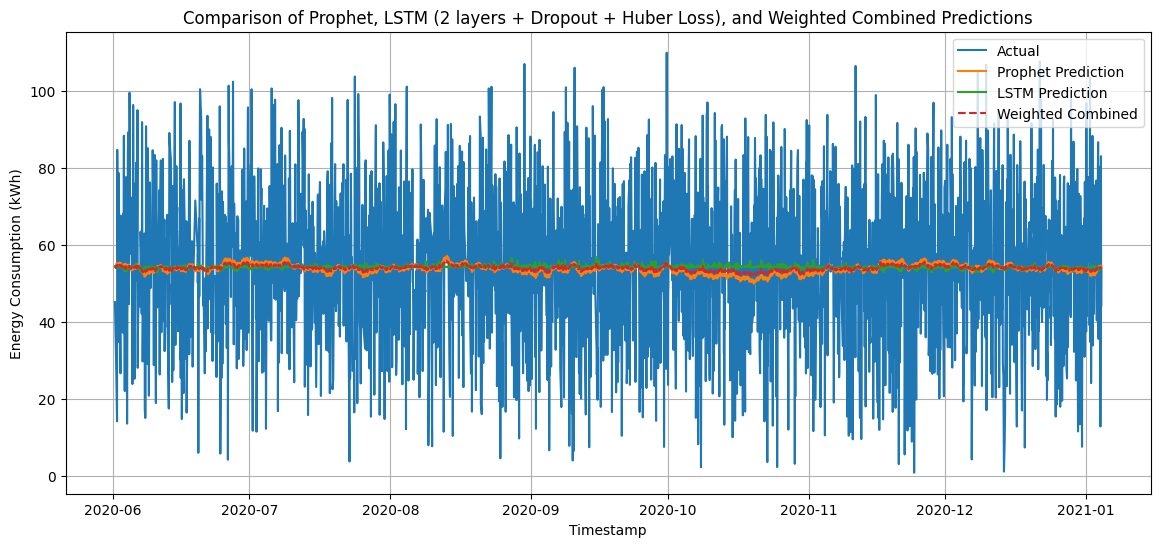

Mean hourly consumption: 54.16300974603132


In [52]:
# ============================= Prophet+LSTM+Huber loss =============================
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.losses import Huber
from scipy.stats import zscore

# ============================= Load Dataset =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= Preprocessing =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# حذف مقادیر منفی انرژی
df = df[df['Energy Consumption (kWh)'] >= 0]

# Remove Outliers using Z-score
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# Calendar features
df = df.sort_values('Timestamp')
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# ============================= Interaction Features =============================
df['hvac_ratio'] = df['HVAC Consumption (kWh)'] / df['Energy Consumption (kWh)']
df['lighting_ratio'] = df['Lighting Consumption (kWh)'] / df['Energy Consumption (kWh)']

# ============================= Derived Weather Feature =============================
df['discomfort_index'] = 0.5 * (df['Temperature (C)'] + 61.0 + ((df['Temperature (C)']-68.0)*1.2) + (df['Humidity (percent)']*0.094))

# ============================= One-hot Encoding for Categorical Columns =============================
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Timestamp']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ============================= Add Lag Features =============================
df['lag_24'] = df['Energy Consumption (kWh)'].shift(24)
df['lag_48'] = df['Energy Consumption (kWh)'].shift(48)
df['lag_168'] = df['Energy Consumption (kWh)'].shift(168)
df.dropna(inplace=True)

# ============================= Cyclical Encoding =============================
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

# ============================= Prepare Data for Prophet =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)
df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_seasonality(name='hourly', period=24, fourier_order=10)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = prophet_model.predict(future)
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= Prepare Data for LSTM =============================
target_col = 'Energy Consumption (kWh)'
feature_cols = df.drop(columns=['Timestamp', target_col]).columns.tolist()

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[feature_cols + [target_col]])

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

# ============================= Build LSTM Model (2 Layers + Dropout, Huber Loss) =============================
lstm_model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss=Huber(delta=1.0))
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# ============================= Predictions =============================
y_pred_lstm_scaled = lstm_model.predict(X_test)

scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1:], scaler.scale_[-1:]
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()

time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]
prophet_cut = prophet_eval[prophet_eval['ds'].isin(time_index_test)].sort_values('ds').reset_index(drop=True)
min_len = min(len(prophet_cut), len(y_pred_lstm))

# ============================= Weighted Ensemble =============================
w_prophet = 1 / mean_absolute_error(prophet_cut['y'][:min_len], prophet_cut['yhat'][:min_len])
w_lstm = 1 / mean_absolute_error(y_test_actual[:min_len], y_pred_lstm[:min_len])
combined_pred = (w_prophet*prophet_cut['yhat'][:min_len] + w_lstm*y_pred_lstm[:min_len]) / (w_prophet + w_lstm)
y_true = prophet_cut['y'][:min_len]

# ============================= Evaluation =============================
print("\nProphet Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_true, prophet_cut['yhat'][:min_len]):.4f}")
print(f"R2: {r2_score(y_true, prophet_cut['yhat'][:min_len]):.4f}")

print("\nLSTM Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_true, y_pred_lstm[:min_len]):.4f}")
print(f"R2: {r2_score(y_true, y_pred_lstm[:min_len]):.4f}")

print("\nWeighted Combined Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= Visualization =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test[:min_len], y_true, label='Actual')
plt.plot(time_index_test[:min_len], prophet_cut['yhat'][:min_len], label='Prophet Prediction')
plt.plot(time_index_test[:min_len], y_pred_lstm[:min_len], label='LSTM Prediction')
plt.plot(time_index_test[:min_len], combined_pred, label='Weighted Combined', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM (2 layers + Dropout + Huber Loss), and Weighted Combined Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()

#####################3
# میانگین مصرف ساعتی
mean_hourly_consumption = df['Energy Consumption (kWh)'].mean()
print("Mean hourly consumption:", mean_hourly_consumption)



c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - loss: 0.0213 - val_loss: 0.0151
Epoch 2/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - loss: 0.0161 - val_loss: 0.0151
Epoch 3/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - loss: 0.0157 - val_loss: 0.0151
Epoch 4/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - loss: 0.0156 - val_loss: 0.0151
Epoch 5/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - loss: 0.0154 - val_loss: 0.0151
Epoch 6/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 7/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 8/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 9/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - loss: 0.0154 - val_loss: 0.0150
Epoch 10/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - loss: 0.0153 - val_loss: 0.0151
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

📈 ارزیابی مدل LSTM با تمام ویژگی‌ها:
MAE: 16.0149
MSE: 4

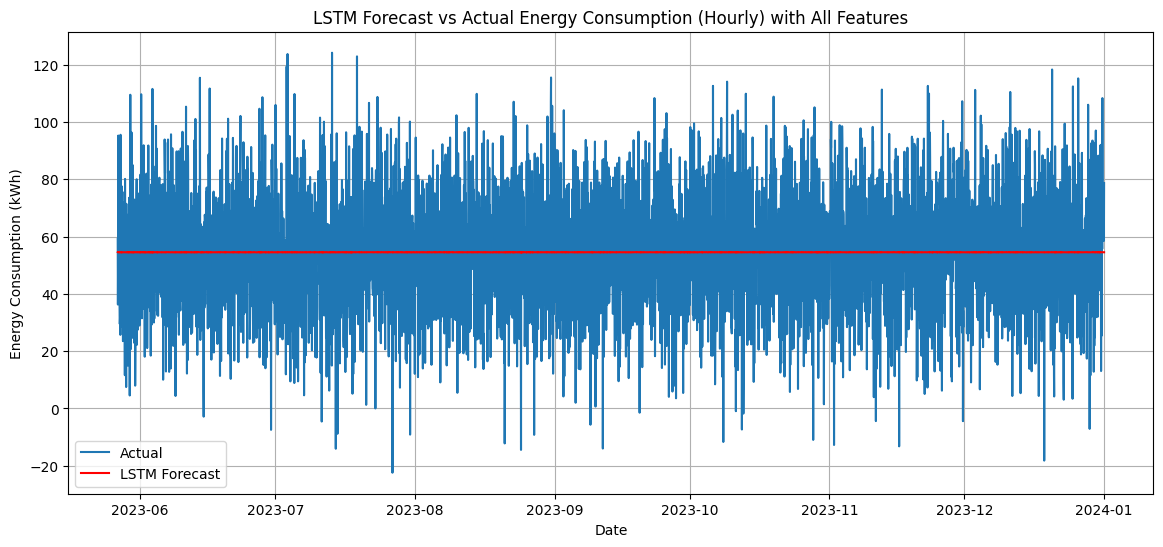

In [ ]:
###############################LSTM+SARIMA###########3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= تبدیل فرمت تاریخ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)

# ============================= پاک‌سازی داده‌ها =============================
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ============================= مرتب‌سازی =============================
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# ============================= کدگذاری ستون‌های غیرعددی =============================
categorical_cols = [
    'Building Type',
    'Occupancy Schedule',
    'Building Orientation',
    'Peak Demand Reduction Indicator',
    'Carbon Emission Reduction Category'
]

df = pd.get_dummies(df, columns=categorical_cols)

# ============================= تنظیم ایندکس و پرکردن گپ‌های زمانی =============================
df.set_index('Timestamp', inplace=True)
df = df.asfreq('h')  # فواصل زمانی ساعتی
df.interpolate(method='linear', inplace=True)  # پر کردن گپ‌ها

# ============================= جدا کردن ستون هدف =============================
target_col = 'Energy Consumption (kWh)'
features = df.drop(columns=[target_col])
target = df[[target_col]]

# ============================= مقیاس‌بندی =============================
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

features_scaled = scaler_X.fit_transform(features)
target_scaled = scaler_y.fit_transform(target)

# ============================= ساخت داده‌های توالی برای LSTM =============================
def create_dataset_multivariate(X, y, time_steps=24):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps), :])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 24
X, y = create_dataset_multivariate(features_scaled, target_scaled, time_steps)

# ============================= تقسیم داده به آموزش و تست =============================
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ============================= ساخت مدل LSTM =============================
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# ============================= آموزش مدل =============================
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# ============================= پیش‌بینی =============================
y_pred_scaled = model.predict(X_test)

# ============================= برگرداندن مقیاس به حالت اولیه =============================
y_test_orig = scaler_y.inverse_transform(y_test)
y_pred_orig = scaler_y.inverse_transform(y_pred_scaled)

# ============================= ارزیابی مدل =============================
mae = mean_absolute_error(y_test_orig, y_pred_orig)
mse = mean_squared_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print("\n📈 ارزیابی مدل LSTM با تمام ویژگی‌ها:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# ============================= ترسیم نمودار =============================
plt.figure(figsize=(14, 6))
plt.plot(df.index[-len(y_test_orig):], y_test_orig, label='Actual')
plt.plot(df.index[-len(y_test_orig):], y_pred_orig, label='LSTM Forecast', color='red')
plt.legend()
plt.title("LSTM Forecast vs Actual Energy Consumption (Hourly) with All Features")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.grid()
plt.show()


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



📊 داده آماده برای Prophet بعد از تکمیل ساعتی:
                   ds          y
0 2018-01-01 00:00:00  74.679912
1 2018-01-01 01:00:00  66.758285
2 2018-01-01 02:00:00  58.836657
3 2018-01-01 03:00:00  53.586516
4 2018-01-01 04:00:00  37.800448
5 2018-01-01 05:00:00  62.581492
6 2018-01-01 06:00:00  52.855726
7 2018-01-01 07:00:00  56.874796
8 2018-01-01 08:00:00  60.893866
9 2018-01-01 09:00:00  46.232676


17:33:24 - cmdstanpy - INFO - Chain [1] start processing
17:33:38 - cmdstanpy - INFO - Chain [1] done processing



📈 ارزیابی مدل Prophet:
MAE: 14.8532
MSE: 352.1252
R²: -0.0041


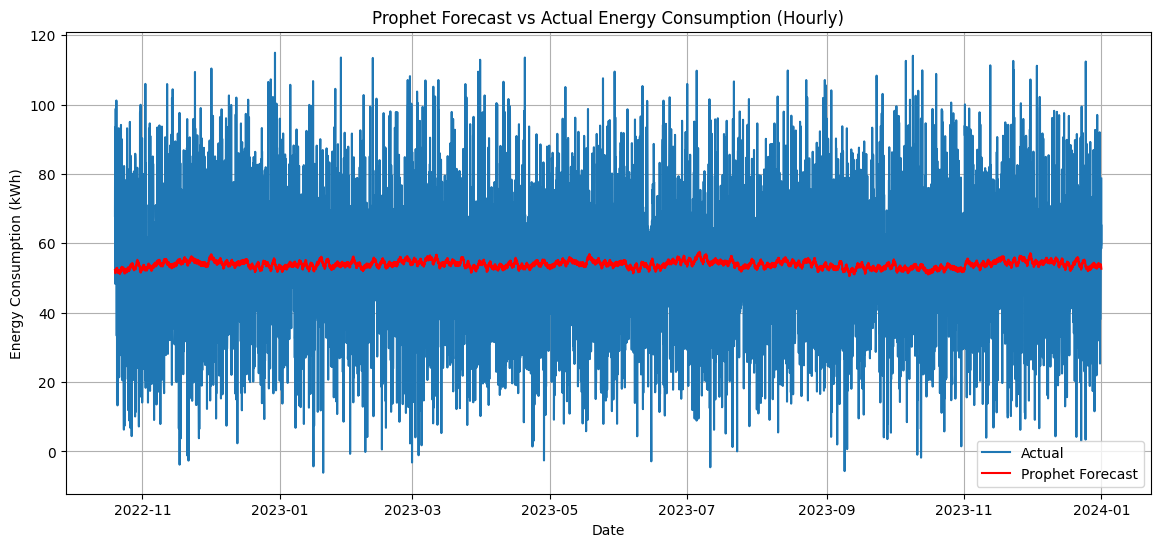

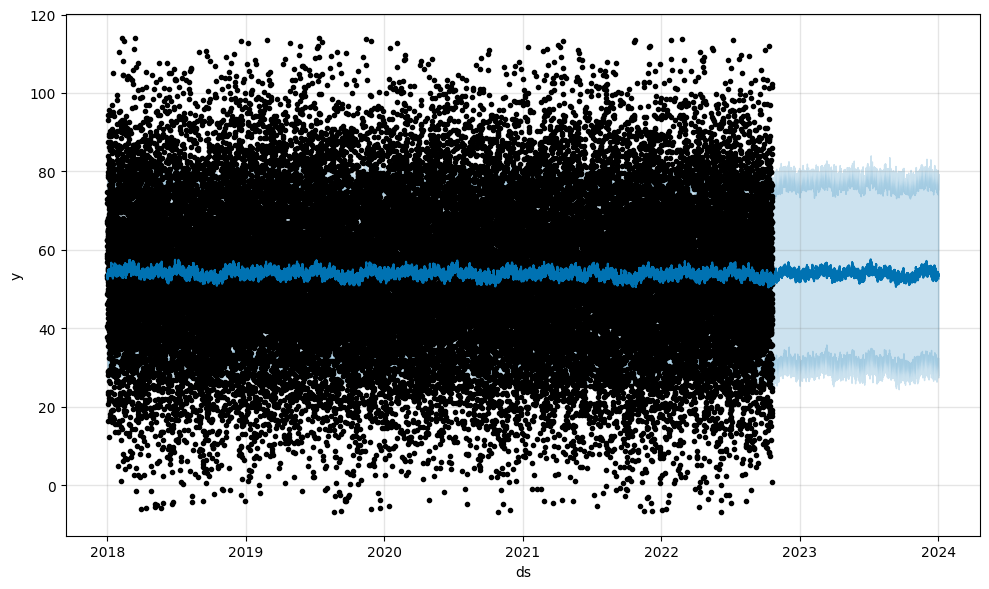

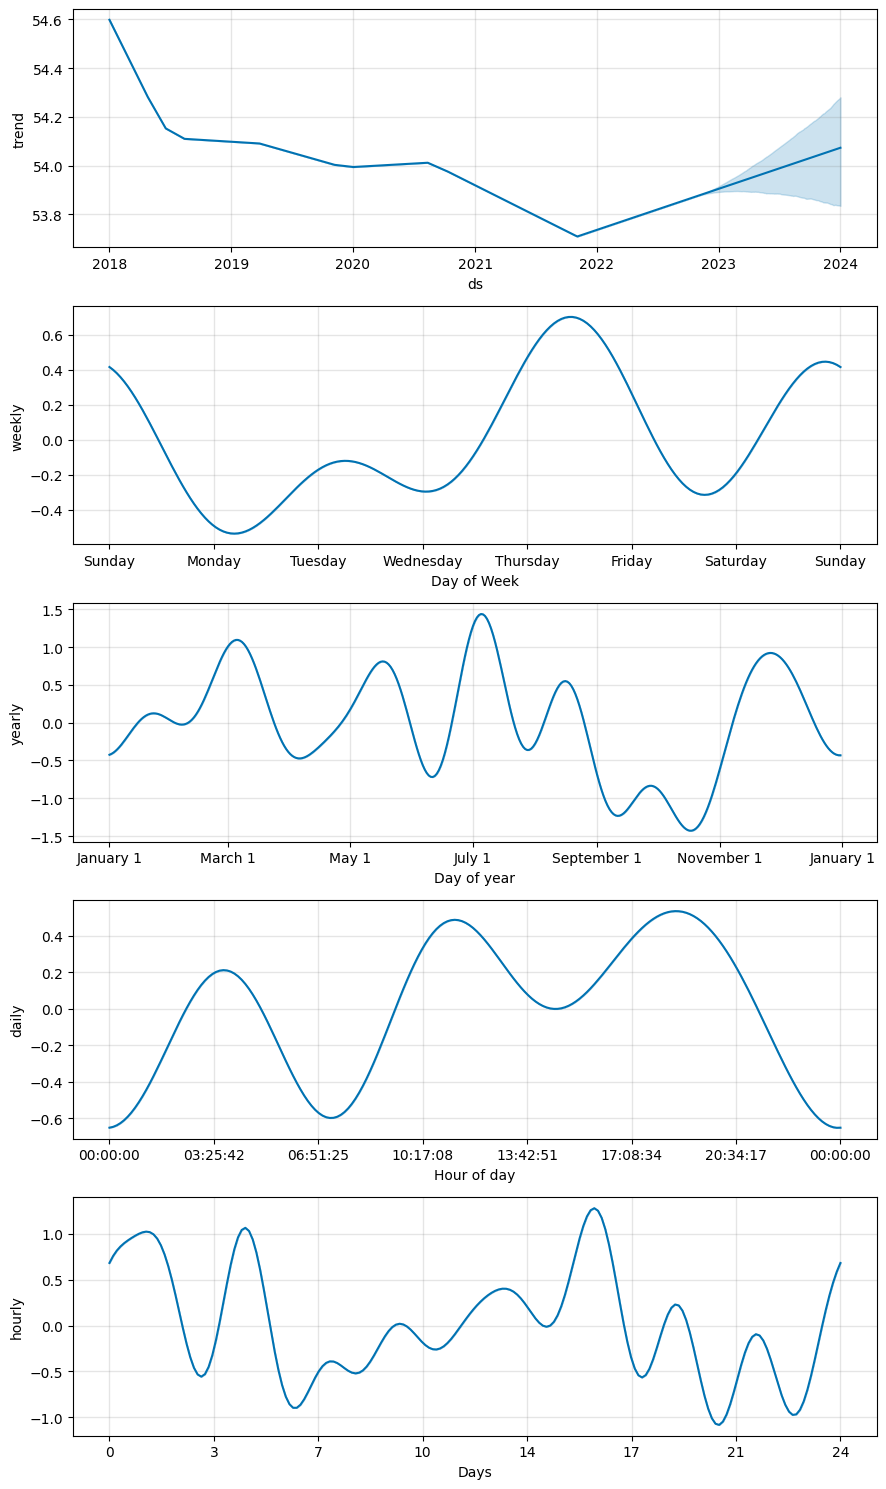

In [2]:
################################prophet#########
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from scipy.stats import zscore

# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= تبدیل فرمت تاریخ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# حذف تاریخ‌های نامعتبر
df.dropna(subset=['Timestamp'], inplace=True)

# ============================= پاک‌سازی داده‌ها =============================
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# حذف داده‌های پرت با Z-score
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# ============================= مرتب‌سازی زمانی =============================
df.sort_values(by='Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# ============================= آماده‌سازی داده برای Prophet =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)

# ============================= تکمیل فواصل زمانی ساعتی =============================
df_prophet = df_prophet.set_index('ds').asfreq('h')  # توجه به h کوچک برای pandas جدید
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')  # پر کردن گپ‌ها
df_prophet.reset_index(inplace=True)

print("\n📊 داده آماده برای Prophet بعد از تکمیل ساعتی:")
print(df_prophet.head(10))

# ============================= تقسیم آموزش و تست =============================
train_size = int(len(df_prophet) * 0.8)
train = df_prophet.iloc[:train_size]
test = df_prophet.iloc[train_size:]

# ============================= ساخت مدل Prophet =============================
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.add_seasonality(name='hourly', period=24, fourier_order=10)


model.fit(train)

# ============================= ساخت future با متد Prophet =============================
future = model.make_future_dataframe(periods=len(test), freq='h')

# ============================= پیش‌بینی =============================
forecast = model.predict(future)

# ============================= آماده‌سازی داده برای ارزیابی =============================
df_eval = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds', how='inner')

y_true = df_eval['y'].values
y_pred = df_eval['yhat'].values

# ============================= ارزیابی مدل =============================
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n📈 ارزیابی مدل Prophet:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# ============================= ترسیم نمودار =============================
plt.figure(figsize=(14, 6))
plt.plot(df_eval['ds'], y_true, label='Actual')
plt.plot(df_eval['ds'], y_pred, label='Prophet Forecast', color='red')
plt.legend()
plt.title("Prophet Forecast vs Actual Energy Consumption (Hourly)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.grid()
plt.show()

# نمودارهای داخلی Prophet
model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()


20:51:39 - cmdstanpy - INFO - Chain [1] start processing
20:51:55 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1/5


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1314/1314 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0412
Epoch 2/5
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.0224
Epoch 3/5
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.0213
Epoch 4/5
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.0213
Epoch 5/5
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0213
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

ارزیابی مدل Prophet:
MAE: 14.8488
R2: -0.0039

ارزیابی مدل LSTM:
MAE: 13.6362
R2: 0.1069

ارزیابی مدل ترکیبی (میانگین ساده):
MAE: 14.0850
R2: 0.0769


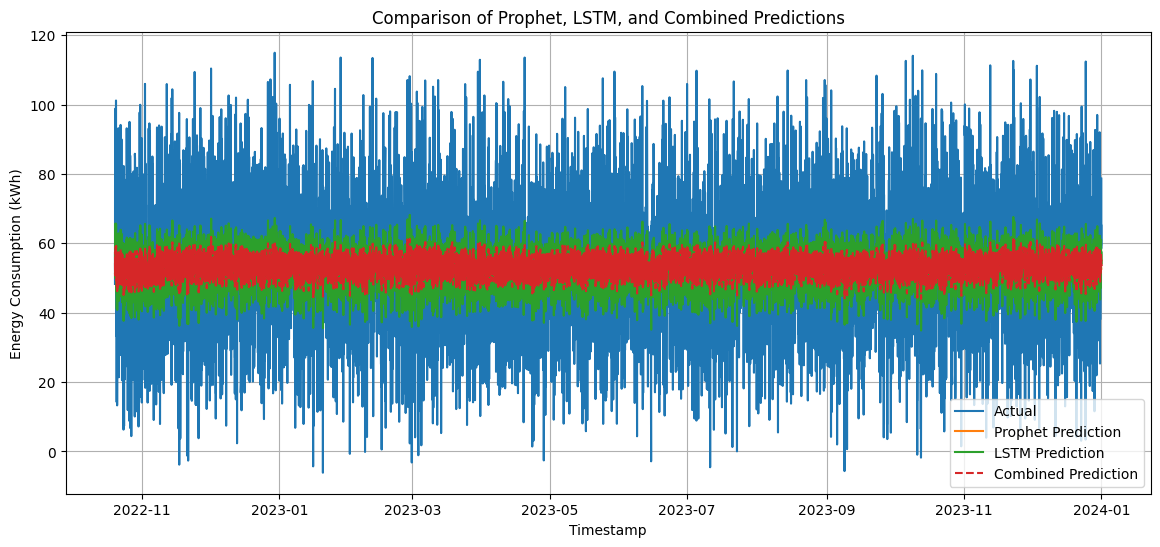

In [ ]:
##################################LSTM+prophet####################33
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from scipy.stats import zscore

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= پیش‌پردازش مشابه =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

df.sort_values(by='Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# ============================= آماده‌سازی برای Prophet =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)

df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

# ============================= تقسیم داده =============================
train_size = int(len(df_prophet) * 0.8)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

# ========== مدل Prophet ==========
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.add_seasonality(name='hourly', period=24, fourier_order=10)
model.fit(train_prophet)

future = model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = model.predict(future)

df_eval_prophet = forecast[['ds', 'yhat']].merge(test_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= آماده‌سازی داده برای LSTM =============================
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_prophet[['y']].values)

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # 24 ساعت پنجره
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

# ============================= ساخت مدل LSTM =============================
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# ============================= پیش‌بینی با LSTM =============================
y_pred_lstm_scaled = lstm_model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

# تنظیم شاخص‌های زمانی برای داده تست LSTM (چون دنباله است)
time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]

# ============================= آماده‌سازی داده‌ها برای ترکیب =============================
# فقط بخش تست Prophet که با LSTM برابر باشد:
df_eval_prophet_cut = df_eval_prophet[df_eval_prophet['ds'].isin(time_index_test)]

# مرتب‌سازی بر اساس زمان
df_eval_prophet_cut = df_eval_prophet_cut.sort_values('ds').reset_index(drop=True)
time_index_test = time_index_test.reset_index(drop=True)

# ============================= ترکیب پیش‌بینی‌ها (میانگین ساده) =============================
combined_pred = (df_eval_prophet_cut['yhat'].values + y_pred_lstm.flatten()) / 2

# ============================= ارزیابی مدل‌ها =============================
y_true = df_eval_prophet_cut['y'].values
y_pred_prophet = df_eval_prophet_cut['yhat'].values
y_pred_lstm = y_pred_lstm.flatten()

print("\nارزیابی مدل Prophet:")
print(f"MAE: {mean_absolute_error(y_true, y_pred_prophet):.4f}")
print(f"R2: {r2_score(y_true, y_pred_prophet):.4f}")

print("\nارزیابی مدل LSTM:")
print(f"MAE: {mean_absolute_error(y_true, y_pred_lstm):.4f}")
print(f"R2: {r2_score(y_true, y_pred_lstm):.4f}")

print("\nارزیابی مدل ترکیبی (میانگین ساده):")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= ترسیم نمودار =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test, y_true, label='Actual')
plt.plot(time_index_test, y_pred_prophet, label='Prophet Prediction')
plt.plot(time_index_test, y_pred_lstm, label='LSTM Prediction')
plt.plot(time_index_test, combined_pred, label='Combined Prediction', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM, and Combined Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


In [ ]:
##############################SARIMA##################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import zscore

# ======================== بارگذاری و پاکسازی داده ==========================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# تبدیل فرمت ستون Timestamp و تنظیم ایندکس زمانی
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.sort_values('Timestamp', inplace=True)
df.set_index('Timestamp', inplace=True)      # این خط خیلی مهم است
df = df.asfreq('h')  # تعیین فرکانس داده ها به صورت ساعتی

# حذف داده‌های تکراری
df = df.drop_duplicates()

# حذف داده‌های پرت با z-score فقط روی ستون‌های عددی
numeric_df = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_df))
df = df[(z_scores < 3).all(axis=1)]

# ======================== تعیین متغیر هدف و ویژگی‌ها ==========================
target_col = 'Energy Consumption (kWh)'

# تمام ستون‌های عددی به جز هدف به عنوان ویژگی (exogenous variables)
features = df.select_dtypes(include=[np.number]).columns.drop(target_col)

X = df[features]
y = df[target_col]

# تقسیم داده به آموزش و تست (براساس زمان، 80 درصد آموزش)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# ======================== انتخاب بهترین مدل SARIMA با Auto ARIMA ==========================
auto_model = auto_arima(
    y_train,
    exogenous=X_train,
    seasonal=True,
    m=24,                # دوره فصلی 24 ساعته برای داده‌های ساعتی
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(f"Best SARIMAX order: {auto_model.order}, seasonal_order: {auto_model.seasonal_order}")

# ======================== آموزش مدل SARIMAX ==========================
sarima_model = SARIMAX(
    y_train,
    exog=X_train,
    order=auto_model.order,
    seasonal_order=auto_model.seasonal_order
)
sarima_result = sarima_model.fit(disp=False)

# ======================== پیش‌بینی مدل SARIMAX ==========================
sarima_forecast = sarima_result.predict(
    start=len(y_train),
    end=len(y_train) + len(y_test) - 1,
    exog=X_test
)

# ======================== محاسبه باقیمانده‌ها (Residuals) ==========================
residuals = y_test.values - sarima_forecast.values

# ======================== آموزش مدل LSTM روی Residuals ==========================
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

def create_sequences(data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_lstm, y_lstm = create_sequences(residuals_scaled, seq_length)

split_lstm = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split_lstm], X_lstm[split_lstm:]
y_train_lstm, y_test_lstm = y_lstm[:split_lstm], y_lstm[split_lstm:]

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, verbose=1)

lstm_pred_scaled = model_lstm.predict(X_test_lstm)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# ======================== ترکیب پیش‌بینی‌ها ==========================
sarima_aligned = sarima_forecast[-len(lstm_pred):].values
final_forecast = sarima_aligned + lstm_pred.flatten()

# ======================== ارزیابی مدل ==========================
true_values = y_test[-len(lstm_pred):].values
mae = mean_absolute_error(true_values, final_forecast)
mse = mean_squared_error(true_values, final_forecast)
r2 = r2_score(true_values, final_forecast)

print("\n🔁 Hybrid SARIMA + LSTM Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# ======================== ترسیم نمودار ==========================
plt.figure(figsize=(14,6))
plt.plot(true_values, label='Actual')
plt.plot(sarima_aligned, label='SARIMA Forecast')
plt.plot(final_forecast, label='Hybrid Forecast (SARIMA + LSTM)', color='red')
plt.legend()
plt.title("Hybrid SARIMA + LSTM Forecasting")
plt.xlabel("Time Steps")
plt.ylabel("Energy Consumption (kWh)")
plt.show()


C:\Users\Adrina\AppData\Local\Temp\ipykernel_13476\2381989376.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq('H')  # تعیین فرکانس داده ها به صورت ساعتی
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\util

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=895.55 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=265488.730, Time=0.70 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=265491.466, Time=84.63 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=265491.263, Time=19.95 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[24]             : AIC=329008.957, Time=0.60 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=265489.311, Time=34.50 sec


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MemoryError: Unable to allocate 143. MiB for an array with shape (30057, 25, 25) and data type float64

18:50:01 - cmdstanpy - INFO - Chain [1] start processing
18:50:19 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0299
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0284
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.0277
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0280
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.0276
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0280
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0276
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0278
Epoch 9/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0273
Epoch 10/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0271
Epoch 11/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0281
Epoch 12/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0271
Epoch 13/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0275
Epoch 14/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0277
Epoch 15/20
657/657 ━━━━━━━━━

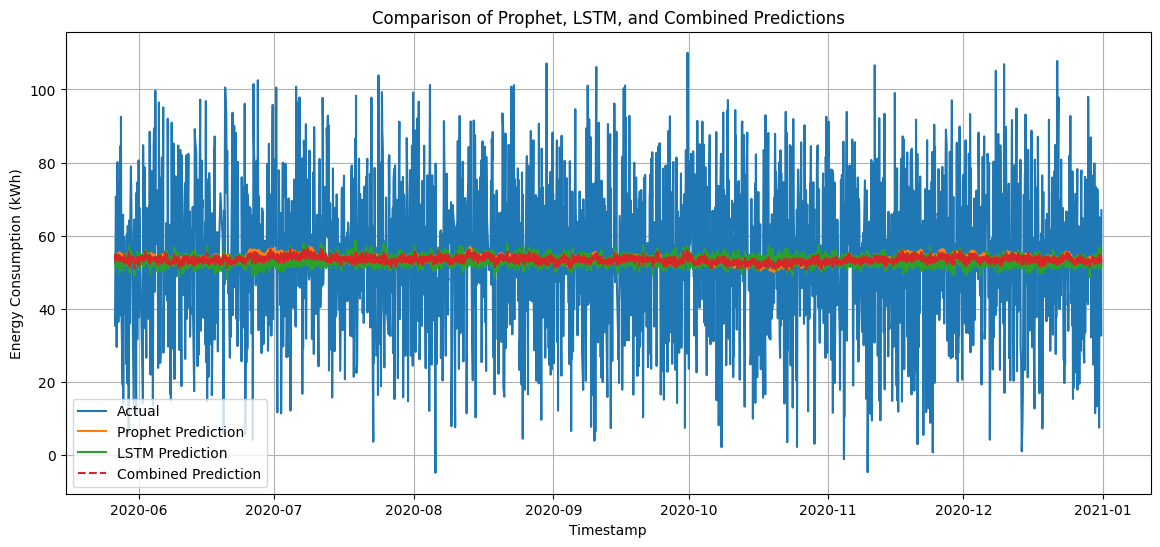

In [10]:
################################## LSTM + Prophet with all Features & dayofweek-month ##################################
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import zscore

# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= پیش‌پردازش =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# حذف outlier ها
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# ویژگی‌های تقویمی ساعتانه
df = df.sort_values('Timestamp')
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# ============================= آماده‌سازی برای Prophet =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)
df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

# تقسیم train/test
train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

# ============================= مدل Prophet =============================
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_seasonality(name='hourly', period=24, fourier_order=10)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = prophet_model.predict(future)
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= آماده‌سازی داده‌ها برای LSTM =============================
# استفاده از تمام ویژگی‌های عددی + ساعتانه
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols.remove('Energy Consumption (kWh)')

# مقیاس‌بندی ویژگی‌ها
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[feature_cols + ['Energy Consumption (kWh)']].values)

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # ویژگی‌ها
        y.append(data[i+seq_length, -1])     # target
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

# ============================= ساخت مدل LSTM =============================
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, X.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# ============================= پیش‌بینی LSTM =============================
y_pred_lstm_scaled = lstm_model.predict(X_test)
# فقط target آخر در scaler است
scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1:], scaler.scale_[-1:]
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()

# ============================= هم‌راستایی زمان‌ها =============================
time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]
prophet_cut = prophet_eval[prophet_eval['ds'].isin(time_index_test)].sort_values('ds').reset_index(drop=True)
min_len = min(len(prophet_cut), len(y_pred_lstm))
combined_pred = (prophet_cut['yhat'].values[:min_len] + y_pred_lstm[:min_len]) / 2
y_true = prophet_cut['y'].values[:min_len]

# ============================= ارزیابی مدل‌ها =============================
print("\nارزیابی مدل Prophet:")
print(f"MAE: {mean_absolute_error(y_true, prophet_cut['yhat'].values[:min_len]):.4f}")
print(f"R2: {r2_score(y_true, prophet_cut['yhat'].values[:min_len]):.4f}")

print("\nارزیابی مدل LSTM:")
print(f"MAE: {mean_absolute_error(y_true, y_pred_lstm[:min_len]):.4f}")
print(f"R2: {r2_score(y_true, y_pred_lstm[:min_len]):.4f}")

print("\nارزیابی مدل ترکیبی (میانگین ساده):")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= ترسیم نمودار =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test[:min_len], y_true, label='Actual')
plt.plot(time_index_test[:min_len], prophet_cut['yhat'].values[:min_len], label='Prophet Prediction')
plt.plot(time_index_test[:min_len], y_pred_lstm[:min_len], label='LSTM Prediction')
plt.plot(time_index_test[:min_len], combined_pred, label='Combined Prediction', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM, and Combined Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


19:02:59 - cmdstanpy - INFO - Chain [1] start processing
19:03:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 64s 92ms/step - loss: 0.0360
Epoch 2/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 57s 87ms/step - loss: 0.0284
Epoch 3/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 64s 98ms/step - loss: 0.0280
Epoch 4/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 61s 92ms/step - loss: 0.0276
Epoch 5/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 60s 91ms/step - loss: 0.0278
Epoch 6/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - loss: 0.0281
Epoch 7/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - loss: 0.0274
Epoch 8/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 61s 92ms/step - loss: 0.0276
Epoch 9/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - loss: 0.0276
Epoch 10/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - loss: 0.0278
Epoch 11/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 79s 89ms/step - loss: 0.0276
Epoch 12/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 59s 90ms/step - loss: 0.0271
Epoch 13/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 60s 91ms/step - loss: 0.0280
Epoch 14/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - loss: 0.0275
Epoch 15/25
656/656 ━━━━━━━━━

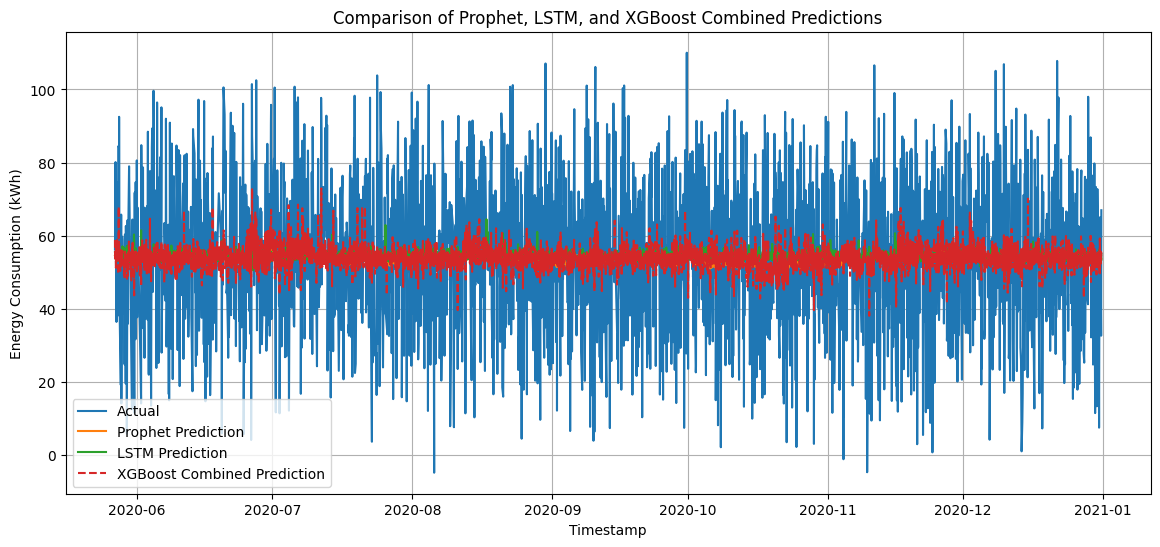

In [ ]:
################################## LSTM + Prophet + XGBoost Meta-Learner ##################################
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import zscore
from xgboost import XGBRegressor

# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= پیش‌پردازش =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# حذف outlier ها
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# ویژگی‌های تقویمی ساعتانه
df = df.sort_values('Timestamp')
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# ============================= Prophet (فقط روند و فصل) =============================
df_prophet = df[['Timestamp', 'Energy Consumption (kWh)']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)
df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_seasonality(name='hourly', period=24, fourier_order=10)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = prophet_model.predict(future)
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= LSTM (نوسانات با تمام ویژگی‌ها) =============================
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols.remove('Energy Consumption (kWh)')

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[feature_cols + ['Energy Consumption (kWh)']].values)

def create_sequences(data, seq_length=72):  # افزایش به 72 ساعت
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # ویژگی‌ها
        y.append(data[i+seq_length, -1])     # target
    return np.array(X), np.array(y)

seq_length = 72
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

lstm_model = Sequential([
    LSTM(128, activation='relu', return_sequences=False, input_shape=(seq_length, X.shape[2])),
    Dense(64, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

y_pred_lstm_scaled = lstm_model.predict(X_test)
scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1:], scaler.scale_[-1:]
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()

# ============================= هم‌راستایی زمان‌ها =============================
time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]
prophet_cut = prophet_eval[prophet_eval['ds'].isin(time_index_test)].sort_values('ds').reset_index(drop=True)
min_len = min(len(prophet_cut), len(y_pred_lstm))

y_true = prophet_cut['y'].values[:min_len]
prophet_pred = prophet_cut['yhat'].values[:min_len]
lstm_pred = y_pred_lstm[:min_len]

# ============================= ترکیب پیشرفته با XGBoost =============================
meta_features = pd.DataFrame({
    "prophet_pred": prophet_pred,
    "lstm_pred": lstm_pred,
})
meta_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4)
meta_model.fit(meta_features, y_true)
combined_pred = meta_model.predict(meta_features)

# ============================= ارزیابی =============================
print("\nارزیابی Prophet:")
print(f"MAE: {mean_absolute_error(y_true, prophet_pred):.4f}")
print(f"R2: {r2_score(y_true, prophet_pred):.4f}")

print("\nارزیابی LSTM:")
print(f"MAE: {mean_absolute_error(y_true, lstm_pred):.4f}")
print(f"R2: {r2_score(y_true, lstm_pred):.4f}")

print("\nارزیابی مدل ترکیبی XGBoost:")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= ترسیم نمودار =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test[:min_len], y_true, label='Actual')
plt.plot(time_index_test[:min_len], prophet_pred, label='Prophet Prediction')
plt.plot(time_index_test[:min_len], lstm_pred, label='LSTM Prediction')
plt.plot(time_index_test[:min_len], combined_pred, label='XGBoost Combined Prediction', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM, and XGBoost Combined Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


In [16]:
################################## LSTM + Prophet + XGBoost Meta-Learner -->(Log(y) Transform) ##################################
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import zscore
from xgboost import XGBRegressor

# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= پیش‌پردازش =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# حذف outlier ها
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
df = df[(z_scores < 3).all(axis=1)]

# ویژگی‌های تقویمی ساعتانه
df = df.sort_values('Timestamp')
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# اضافه کردن y_log
df['y_log'] = np.log1p(df['Energy Consumption (kWh)'])

# ============================= Prophet (فقط روند و فصل روی log) =============================
df_prophet = df[['Timestamp', 'y_log']].copy()
df_prophet.rename(columns={'Timestamp': 'ds', 'y_log': 'y'}, inplace=True)
df_prophet = df_prophet.set_index('ds').asfreq('h')
df_prophet['y'] = df_prophet['y'].interpolate(method='linear')
df_prophet.reset_index(inplace=True)

train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_seasonality(name='hourly', period=24, fourier_order=10)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='h')
forecast = prophet_model.predict(future)
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# ============================= LSTM (روی log) =============================
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols.remove('Energy Consumption (kWh)')  # target اصلی حذف میشه

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[feature_cols].values)  # شامل y_log

def create_sequences(data, seq_length=72):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # ویژگی‌ها (بدون y_log)
        y.append(data[i+seq_length, -1])     # target: y_log
    return np.array(X), np.array(y)

seq_length = 72
X, y = create_sequences(data_scaled, seq_length)

train_size_lstm = int(len(X) * 0.8)
X_train, y_train = X[:train_size_lstm], y[:train_size_lstm]
X_test, y_test = X[train_size_lstm:], y[train_size_lstm:]

lstm_model = Sequential([
    LSTM(128, activation='relu', return_sequences=False, input_shape=(seq_length, X.shape[2])),
    Dense(64, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# پیش‌بینی LSTM
y_pred_lstm_scaled = lstm_model.predict(X_test)

# برگرداندن به مقیاس log واقعی
scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1:], scaler.scale_[-1:]
y_pred_lstm_log = scaler_target.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
y_test_actual_log = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()

# تبدیل به مقیاس اصلی
y_pred_lstm = np.expm1(y_pred_lstm_log)
y_test_actual = np.expm1(y_test_actual_log)

# ============================= هم‌راستایی زمان‌ها =============================
time_index_test = df_prophet['ds'].iloc[seq_length + train_size_lstm : seq_length + train_size_lstm + len(y_pred_lstm)]
prophet_cut = prophet_eval[prophet_eval['ds'].isin(time_index_test)].sort_values('ds').reset_index(drop=True)
min_len = min(len(prophet_cut), len(y_pred_lstm))

# y_true و prophet_pred روی مقیاس اصلی
y_true = np.expm1(prophet_cut['y'].values[:min_len])
prophet_pred = np.expm1(prophet_cut['yhat'].values[:min_len])
lstm_pred = y_pred_lstm[:min_len]

# ============================= ترکیب پیشرفته با XGBoost =============================
meta_features = pd.DataFrame({
    "prophet_pred": prophet_pred,
    "lstm_pred": lstm_pred,
})
meta_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4)
meta_model.fit(meta_features, y_true)
combined_pred = meta_model.predict(meta_features)

# ============================= ارزیابی =============================
print("\nارزیابی Prophet (log-transform):")
print(f"MAE: {mean_absolute_error(y_true, prophet_pred):.4f}")
print(f"R2: {r2_score(y_true, prophet_pred):.4f}")

print("\nارزیابی LSTM (log-transform):")
print(f"MAE: {mean_absolute_error(y_true, lstm_pred):.4f}")
print(f"R2: {r2_score(y_true, lstm_pred):.4f}")

print("\nارزیابی مدل ترکیبی XGBoost (log-transform):")
print(f"MAE: {mean_absolute_error(y_true, combined_pred):.4f}")
print(f"R2: {r2_score(y_true, combined_pred):.4f}")

# ============================= ترسیم نمودار =============================
plt.figure(figsize=(14,6))
plt.plot(time_index_test[:min_len], y_true, label='Actual')
plt.plot(time_index_test[:min_len], prophet_pred, label='Prophet Prediction')
plt.plot(time_index_test[:min_len], lstm_pred, label='LSTM Prediction')
plt.plot(time_index_test[:min_len], combined_pred, label='XGBoost Combined Prediction', linestyle='--')
plt.legend()
plt.title('Comparison of Prophet, LSTM, and XGBoost Combined Predictions (with log-transform)')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
20:57:31 - cmdstanpy - INFO - Chain [1] start processing
20:57:44 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Adrina\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - loss: nan
Epoch 2/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 57s 87ms/step - loss: nan
Epoch 3/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - loss: nan
Epoch 4/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 60s 91ms/step - loss: nan
Epoch 5/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - loss: nan
164/164 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step

ارزیابی Prophet (log-transform):
MAE: 14.5957
R2: -0.0402

ارزیابی LSTM (log-transform):


ValueError: Input contains NaN.

18:21:29 - cmdstanpy - INFO - Chain [1] start processing
18:21:29 - cmdstanpy - INFO - Chain [1] done processing



ارزیابی Prophet (Daily, IQR Filtered, log-transform):
MAE: 114.6542
MSE: 20196.9605
R2 : 0.0069


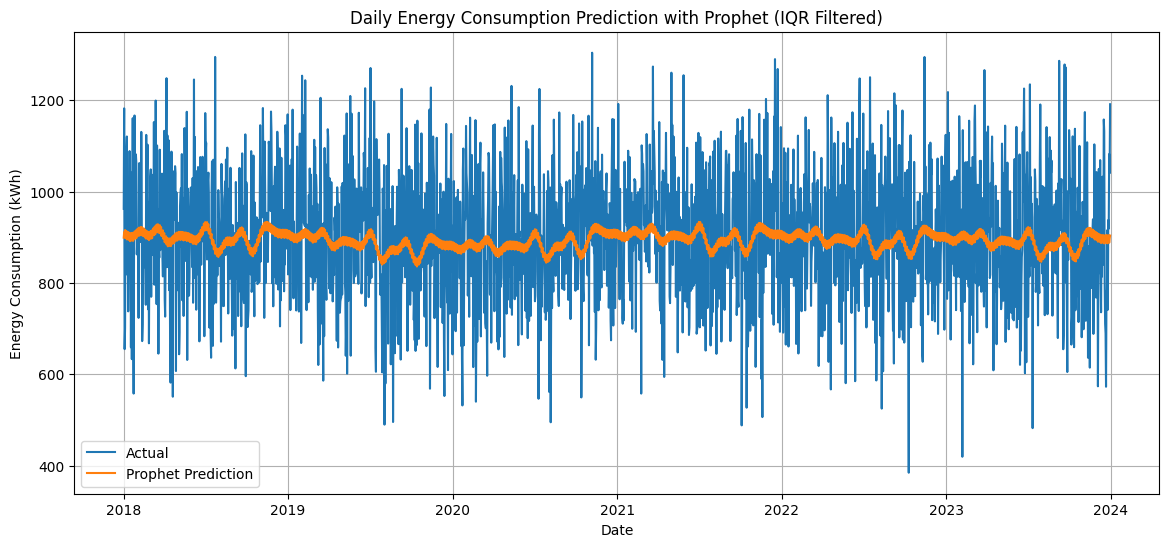

In [ ]:
################################## Prophet (converting Hourly to daily + IQR Filtering) ##################################
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= پیش‌پردازش =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df = df.sort_values('Timestamp')

# ============================= IQR Filtering روی Energy Consumption =============================
Q1 = df['Energy Consumption (kWh)'].quantile(0.25)
Q3 = df['Energy Consumption (kWh)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Energy Consumption (kWh)'] >= lower_bound) & (df['Energy Consumption (kWh)'] <= upper_bound)]

# ============================= تبدیل داده ساعتی به روزانه =============================
df_daily = df.set_index('Timestamp').resample('D').sum()

# Prophet نیاز به دو ستون ds و y دارد
df_prophet = df_daily[['Energy Consumption (kWh)']].reset_index()
df_prophet.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)

# log-transform برای پایدار کردن واریانس
df_prophet['y'] = np.log1p(df_prophet['y'])

# ============================= Train / Test split =============================
train_size = int(len(df_prophet) * 0.9)
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

# ============================= Prophet model =============================
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='D')
forecast = prophet_model.predict(future)

# ============================= Evaluation =============================
prophet_eval = forecast[['ds', 'yhat']].merge(df_prophet[['ds', 'y']], on='ds', how='inner')

# برگرداندن به مقیاس اصلی
y_true = np.expm1(prophet_eval['y'].values)
y_pred = np.expm1(prophet_eval['yhat'].values)

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nارزیابی Prophet (Daily, IQR Filtered, log-transform):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2 : {r2:.4f}")

# ============================= Plot =============================
plt.figure(figsize=(14,6))
plt.plot(prophet_eval['ds'], y_true, label='Actual')
plt.plot(prophet_eval['ds'], y_pred, label='Prophet Prediction')
plt.legend()
plt.title('Daily Energy Consumption Prediction with Prophet (IQR Filtered)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()


ارزیابی XGBoost (Daily, IQR Filtered, log-transform):
MAE: 120.1228
MSE: 22961.9720
R2 : -0.1459


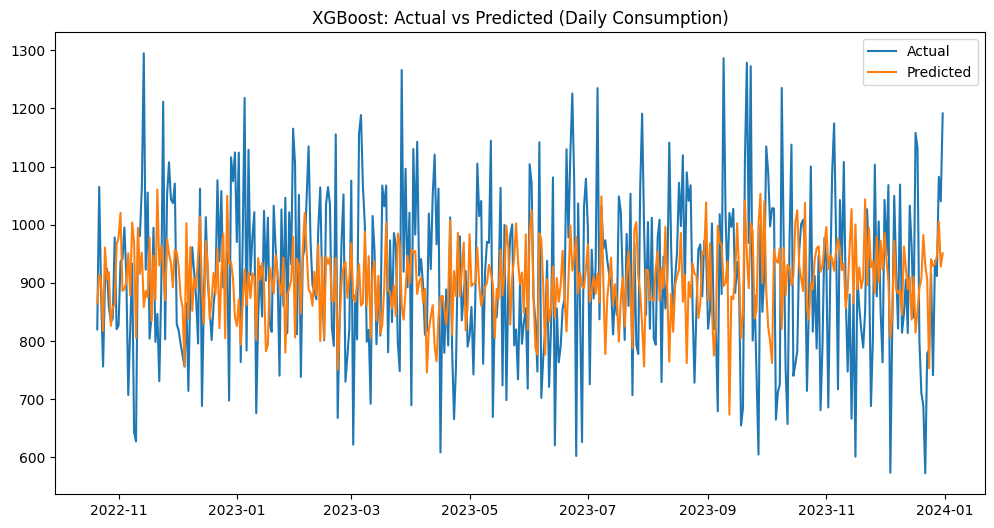

Mean daily consumption: 904.805578710932


In [ ]:
# ============================= converting Hourly to daily =============================
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# ============================= Load Dataset =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# تبدیل ستون زمان به فرمت datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# ============================= Aggregate to Daily =============================
df = df.groupby(df['Timestamp'].dt.date).agg({'Energy Consumption (kWh)': 'sum'}).reset_index()
df.rename(columns={'Timestamp': 'ds', 'Energy Consumption (kWh)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# ============================= IQR Outlier Filtering =============================
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['y'] >= lower_bound) & (df['y'] <= upper_bound)]

# ============================= Log Transform =============================
df['y'] = np.log1p(df['y'])  # log(1+y)

# ============================= Feature Engineering =============================
df['dayofweek'] = df['ds'].dt.dayofweek
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df['day'] = df['ds'].dt.day
df['lag1'] = df['y'].shift(1)
df['lag2'] = df['y'].shift(2)
df['lag7'] = df['y'].shift(7)

df.dropna(inplace=True)

# ============================= Train/Test Split =============================
X = df[['dayofweek', 'month', 'year', 'day', 'lag1', 'lag2', 'lag7']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ============================= XGBoost Model =============================
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ============================= Prediction =============================
y_pred = xgb_model.predict(X_test)

# بازگرداندن داده از log
y_test_inv = np.expm1(y_test)
y_pred_inv = np.expm1(y_pred)

# ============================= Evaluation =============================
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print("ارزیابی XGBoost (Daily, IQR Filtered, log-transform):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2 : {r2:.4f}")

# ============================= Plot =============================
plt.figure(figsize=(12, 6))
plt.plot(df['ds'].iloc[-len(y_test):], y_test_inv, label="Actual")
plt.plot(df['ds'].iloc[-len(y_test):], y_pred_inv, label="Predicted")
plt.legend()
plt.title("XGBoost: Actual vs Predicted (Daily Consumption)")
plt.show()

#######################
mean_consumption = df_daily['Energy Consumption (kWh)'].mean()
print("Mean daily consumption:", mean_consumption)

